# Pima Indians Diabetes Dataset
### The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.
It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

1)Number of times pregnant.

2)Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

3)Diastolic blood pressure (mm Hg).

4)Triceps skinfold thickness (mm).

5)2-Hour serum insulin (mu U/ml).

6)Body mass index (weight in kg/(height in m)^2).

7)Diabetes pedigree function.

8)Age (years).

9)Class variable (0 or 1).

## Import the Libraries

In [1]:
#load the libraries
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
from pickle import load

## Load the Dataset

In [2]:
# Loading the dataset
filename="C:\Users\SHIVAPRASAD\Desktop\datasets\pima-indians-diabetes.data.csv"
names = ['Number of times pregnant','Plasma glucose concentration','Diastolic blood pressure','Triceps skinfold thickness',
         '2-Hour serum insulin','Body mass index','Diabetes pedigree function','Age','Class variable']
dataframe=read_csv(filename, names=names)

## Summarizing the Dataset

In [3]:
#shape
print dataframe.shape

(768, 9)


In [4]:
#Head
print dataframe.head()

   Number of times pregnant  Plasma glucose concentration  \
0                         6                           148   
1                         1                            85   
2                         8                           183   
3                         1                            89   
4                         0                           137   

   Diastolic blood pressure  Triceps skinfold thickness  2-Hour serum insulin  \
0                        72                          35                     0   
1                        66                          29                     0   
2                        64                           0                     0   
3                        66                          23                    94   
4                        40                          35                   168   

   Body mass index  Diabetes pedigree function  Age  Class variable  
0             33.6                       0.627   50               1  
1     

In [5]:
#Tail
print dataframe.tail()

     Number of times pregnant  Plasma glucose concentration  \
763                        10                           101   
764                         2                           122   
765                         5                           121   
766                         1                           126   
767                         1                            93   

     Diastolic blood pressure  Triceps skinfold thickness  \
763                        76                          48   
764                        70                          27   
765                        72                          23   
766                        60                           0   
767                        70                          31   

     2-Hour serum insulin  Body mass index  Diabetes pedigree function  Age  \
763                   180             32.9                       0.171   63   
764                     0             36.8                       0.340   27   
765              

In [6]:
#Dataset types
print dataframe.dtypes

Number of times pregnant          int64
Plasma glucose concentration      int64
Diastolic blood pressure          int64
Triceps skinfold thickness        int64
2-Hour serum insulin              int64
Body mass index                 float64
Diabetes pedigree function      float64
Age                               int64
Class variable                    int64
dtype: object


In [7]:
#Statistical Summary of the dataset
print dataframe.describe()

       Number of times pregnant  Plasma glucose concentration  \
count                768.000000                    768.000000   
mean                   3.845052                    120.894531   
std                    3.369578                     31.972618   
min                    0.000000                      0.000000   
25%                    1.000000                     99.000000   
50%                    3.000000                    117.000000   
75%                    6.000000                    140.250000   
max                   17.000000                    199.000000   

       Diastolic blood pressure  Triceps skinfold thickness  \
count                768.000000                  768.000000   
mean                  69.105469                   20.536458   
std                   19.355807                   15.952218   
min                    0.000000                    0.000000   
25%                   62.000000                    0.000000   
50%                   72.000000     

## Visualizing the dataset

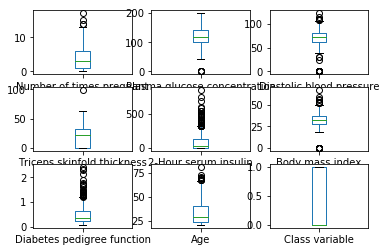

In [8]:
#Box and the whisker plots,it tells the maximum and minimum value of the individual dataset
dataframe.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

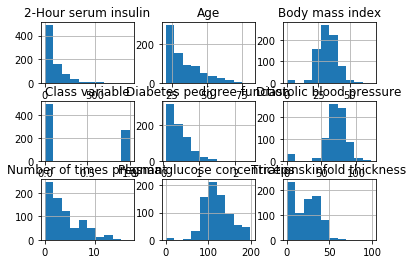

In [9]:
#Histograms
dataframe.hist()
pyplot.show()

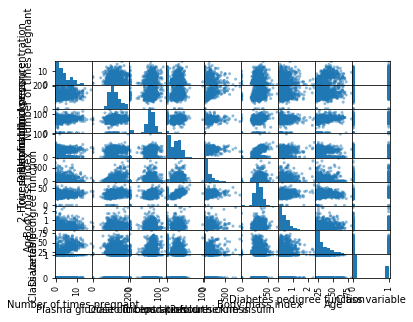

In [10]:
# scatter plot matrix
scatter_matrix(dataframe)
pyplot.show()

## Standarding the Dataset
Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1. 

In [24]:
#standardizing the datatset
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X) 

# summarize transformed data
set_printoptions(precision=3)  
print(rescaledX[0:5,:]) 

[[ 0.353  0.744  0.59   0.354  0.     0.501  0.234  0.483]
 [ 0.059  0.427  0.541  0.293  0.     0.396  0.117  0.167]
 [ 0.471  0.92   0.525  0.     0.     0.347  0.254  0.183]
 [ 0.059  0.447  0.541  0.232  0.111  0.419  0.038  0.   ]
 [ 0.     0.688  0.328  0.354  0.199  0.642  0.944  0.2  ]]


## Evaluate some algorithms

In [12]:
#Train and test split
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
print X_validation


[[   1.      90.      62.    ...,   27.2      0.58    24.   ]
 [   7.     181.      84.    ...,   35.9      0.586   51.   ]
 [  13.     152.      90.    ...,   26.8      0.731   43.   ]
 ..., 
 [   0.     128.      68.    ...,   30.5      1.391   25.   ]
 [   2.     100.      66.    ...,   32.9      0.867   28.   ]
 [   2.      91.      62.    ...,   27.3      0.525   22.   ]]


## Spot Checking of the Algorithm

In [13]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.776864 (0.060738)
LDA: 0.773559 (0.058283)
KNN: 0.710153 (0.064599)
CART: 0.687335 (0.042800)
NB: 0.750820 (0.050575)
SVM: 0.656293 (0.044581)


## Plot the distribution scores of each algorithm

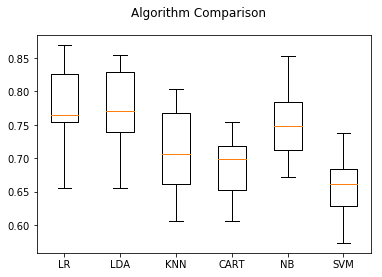

In [16]:
# Compare Algorithms(which tells the maximum and minimum values with the help of box plots)
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [22]:
# Make predictions on validation dataset
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_validation)
#print Y_validation
#print predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.772727272727
[[87 10]
 [25 32]]
             precision    recall  f1-score   support

        0.0       0.78      0.90      0.83        97
        1.0       0.76      0.56      0.65        57

avg / total       0.77      0.77      0.76       154



## Finalizing the dataset

In [21]:
#Finalizing the model with Pickle
X = array[:,0:8]
Y = array[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)

# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print 'The accuracy is:',(result*100),"%"

The accuracy is: 75.5905511811 %
